# HANDS ON PYTHON FOR FINANCE

## References

* https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346374/5/ch05lvl1sec31/portfolio-allocation-and-the-sharpe-ratioand-xa0

## Library_Import

In [213]:
    # Data manipulation
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb

In [214]:
    # Visualizations
import matplotlib as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)    

In [215]:
# Cufflinks binds Plotly directly to pandas dataframes.
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

In [216]:
# IMPORT API FUNCTIONS
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import requests
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import iexfinance
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
from iexfinance.stocks import get_historical_intraday
from iexfinance.refdata import get_symbols
from iexfinance.data_apis import get_data_points
from iexfinance.data_apis import get_time_series
from iexfinance.altdata import get_social_sentiment
from iexfinance.altdata import get_ceo_compensation

In [217]:
# MISC LIB IMPORTS
import jupytemplate
import locale
from datetime import date, datetime
from nsepy import get_history
import os
import time
import csv
import json
from patsy import dmatrices

In [218]:
# lOCAL LIBRARY IMPORT
import jupytemplate
print(jupytemplate.get_template_path())
import sys
# uncomment and fill to import local libraries
# sys.path.append('path/to/local/lib') 
# Import local libraries

C:\Users\gordo\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\jupytemplate\jupytemplate\template.ipynb


# Portfolio Allocation

In [14]:
import pandas as pd
import quandl 

In [15]:
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2018-01-01')


aapl_stock = quandl.get('WIKI/AAPL.11',start_date=start_date,end_date=end_date)
cisco_stock = quandl.get('WIKI/CSCO.11',start_date=start_date,end_date=end_date)
ibm_stock = quandl.get('WIKI/IBM.11',start_date=start_date,end_date=end_date)
amzn_stock = quandl.get('WIKI/AMZN.11',start_date=start_date,end_date=end_date)

In [16]:
aapl_stock.to_csv('AAPL_CLOSE')
cisco_stock.to_csv('CISCO_CLOSE')
ibm_stock.to_csv('IBM_CLOSE')
amzn_stock.to_csv('AMZN_CLOSE')

In [17]:
aapl_stock = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco_stock = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm_stock = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn_stock = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

## Nominalize_Returns & Allocation & Position_Values & Position_Values

### Nominalize_Returns

In [18]:
for df_stock in (aapl_stock,cisco_stock,ibm_stock,amzn_stock):
    df_stock['Normalize Return'] = df_stock['Adj. Close']/df_stock.iloc[0]['Adj. Close']


aapl_stock.head()

,Adj. Close,Normalize Return
Date,,
2013-01-02,71.195748,1.000000
2013-01-03,70.296565,0.987370
2013-01-04,68.338996,0.959875
2013-01-07,67.937002,0.954228
2013-01-08,68.119845,0.956797


### Allocation

In [19]:
for df_stock,allocation in zip([aapl_stock,cisco_stock,ibm_stock,amzn_stock],[.3,.2,.4,.1]):
    df_stock['Allocation'] = df_stock['Normalize Return']*allocation
    
aapl_stock.head()

,Adj. Close,Normalize Return,Allocation
Date,,,
2013-01-02,71.195748,1.000000,0.300000
2013-01-03,70.296565,0.987370,0.296211
2013-01-04,68.338996,0.959875,0.287962
2013-01-07,67.937002,0.954228,0.286269
2013-01-08,68.119845,0.956797,0.287039


### Position_Values

In [20]:
for df_stock in [aapl_stock,cisco_stock,ibm_stock,amzn_stock]:
    df_stock['Position Values'] = df_stock['Allocation']*100000

In [21]:
aapl_stock.head()

,Adj. Close,Normalize Return,Allocation,Position Values
Date,,,,
2013-01-02,71.195748,1.000000,0.300000,30000.000000
2013-01-03,70.296565,0.987370,0.296211,29621.108136
2013-01-04,68.338996,0.959875,0.287962,28796.240643
2013-01-07,67.937002,0.954228,0.286269,28626.850992
2013-01-08,68.119845,0.956797,0.287039,28703.895962


### Position_Values

In [22]:
portfolio_val = pd.concat([aapl_stock['Position Values'],
                           cisco_stock['Position Values'],ibm_stock['Position Values'],
                           amzn_stock['Position Values']],axis=1)


In [23]:
portfolio_val

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2013-01-02,30000.000000,20000.000000,40000.000000,10000.000000
2013-01-03,29621.108136,20108.161259,39779.984721,10045.470444
2013-01-04,28796.240643,20139.528024,39519.225872,10071.509075
2013-01-07,28626.850992,19951.130777,39346.065699,10433.298356
2013-01-08,28703.895962,19970.501475,39291.061879,10352.493102
...,...,...,...,...
2017-12-22,73744.572697,44178.291846,36118.056735,45406.707862
2017-12-26,71873.674447,44098.071861,36196.213841,45733.162333
2017-12-27,71886.315651,44189.751844,36267.265756,45946.912285


## Portfolio_Values & Total_Position

### Portfolio_Values

In [24]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2013-01-02,30000.000000,20000.000000,40000.000000,10000.000000
2013-01-03,29621.108136,20108.161259,39779.984721,10045.470444
2013-01-04,28796.240643,20139.528024,39519.225872,10071.509075
2013-01-07,28626.850992,19951.130777,39346.065699,10433.298356
2013-01-08,28703.895962,19970.501475,39291.061879,10352.493102


### Total_Position

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [27]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2013-01-02,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000
2013-01-03,29621.108136,20108.161259,39779.984721,10045.470444,99554.724560
2013-01-04,28796.240643,20139.528024,39519.225872,10071.509075,98526.503613
2013-01-07,28626.850992,19951.130777,39346.065699,10433.298356,98357.345824
2013-01-08,28703.895962,19970.501475,39291.061879,10352.493102,98317.952418


## Graphs:   Total_Portfolio_Value  &  Total_Position_Value

### Total_Portfolio_Value

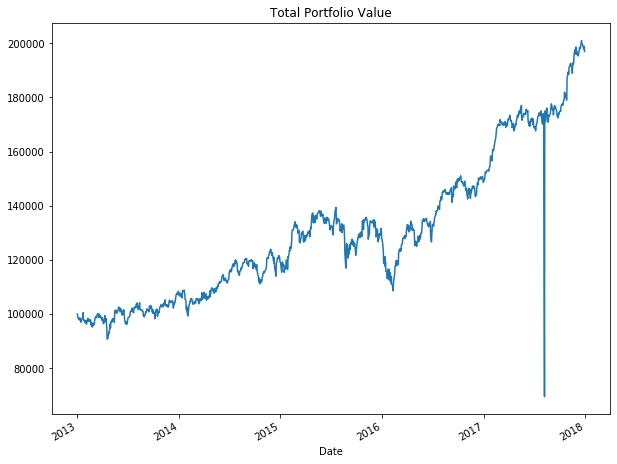

In [33]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')
plt.show()

### Total_Position_Value

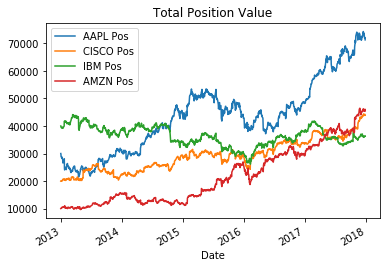

In [44]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')
plt.title('Total Position Value')

plt.show()

# Assumptions of Markowitz's theory
* Investors are rational and act in a way to increase a given level of income.
* Financial specialists have free access to up-to-date data and revise this data based on the returns and risk.
* The market sectors are effective and assimilate the data rapidly and flawlessly.
* Financial specialists are risk-averse and attempt to limit risk and amplify return.
* Speculators make choices in light of the expected returns and the standard deviation from the means of these profits.
* Investors would always choose a higher return over a lower return.

## Obtaining the efficient frontier in Python – part 1

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

companies = ['WMT', 'FB']

df = pd.read_csv(r'C:/Users/gordo/Programming/Education/Packt/Hands_On_Python_For_Finance/Chapter05/Walmart_FB_2014_2017.csv',
                 index_col='Date')

df.head()

,WMT,FB
Date,,
2013-12-31,71.126411,54.650002
2014-01-02,71.325287,54.709999
2014-01-03,71.090279,54.560001
2014-01-06,70.692558,57.200001
2014-01-07,70.909485,57.919998


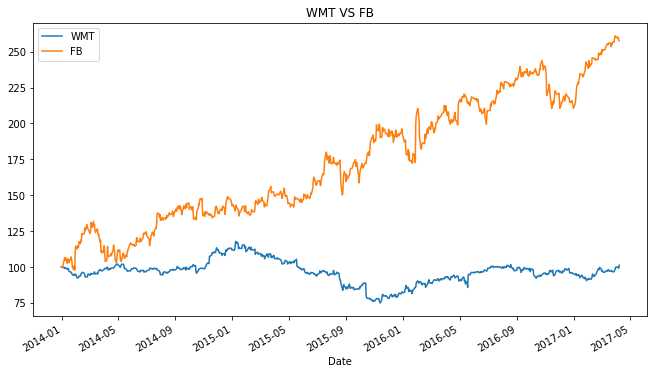

In [50]:
df.index=pd.to_datetime(df.index)

(df / df.iloc[0] * 100).plot(figsize=(11, 6))
plt.title('WMT VS FB')

plt.show()

### LOG_RETURNS

In [52]:
log_returns = np.log(df/ df.shift(1))

log_returns.head()

,WMT,FB
Date,,
2013-12-31,NaN,NaN
2014-01-02,0.002792,0.001097
2014-01-03,-0.003300,-0.002745
2014-01-06,-0.005610,0.047253
2014-01-07,0.003064,0.012509


### ANNUAL_LOG_RETURNS

In [53]:
#Calculating Mean

log_returns.mean() * 250

WMT    0.003551
FB     0.287439
dtype: float64

### COVARIANCE

In [54]:
# Calculating Covariance

log_returns.cov() * 250

,WMT,FB
WMT,0.031544,0.008777
FB,0.008777,0.082786


### Calculating Correlation

In [55]:
# Calculating Correlation

log_returns.corr()

,WMT,FB
WMT,1.000000,0.171746
FB,0.171746,1.000000


### COUNT_NUMBER_OF_ASSETS

In [56]:
num_assets = len(companies)

num_assets

2

In [58]:
arr = np.random.random(2)
arr

array([0.42725998, 0.72423617])

In [59]:
arr[0]+arr[1]

1.1514961535449622

### WEIGHTS

In [60]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.84267892, 0.15732108])

## Obtaining the efficient frontier in Python – part 2

In [61]:
np.sum(weights * log_returns.mean())* 250

0.048212551265956645

### EXPECTED_PORTFOLIO   VARIANCE   &   VOLATILITY

#### VARIANCE

In [62]:
# Expected Portfolio Variance

np.dot(weights.T,np.dot(log_returns.cov()* 250,weights))

0.02677570151394479

#### VOLATILITY

In [64]:
# Expected Portfolio Volatility

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()* 250,weights)))

0.16363282529475798

### PORTFOLIO_RETURNS   vs   PORTFOLIO_VOLATILITY

In [65]:
portfolio_returns=[]
portfolio_volatilities=[]
for x in range(1000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov(),weights))))
    
portfolio_returns,portfolio_volatilities

([0.06451215073470672,
  0.16473078829036486,
  0.20662985823839589,
  0.20359294011828993,
  0.10251310122750279,
  0.16259561684338467,
  0.11871831001959471,
  0.11866699412380315,
  0.2207149255581759,
  0.22965055340918195,
  0.0855596542648228,
  0.04598378948245071,
  0.1158457560531767,
  0.12050393439701935,
  0.18358889957663294,
  0.1310445854318462,
  0.146841486084433,
  0.16160927304099654,
  0.11089423527596466,
  0.15424647648640916,
  0.1712810064209221,
  0.25537463099683805,
  0.2815969363973003,
  0.1326380600701719,
  0.1522549774795768,
  0.23224407589037774,
  0.07330683404956452,
  0.03368562445605245,
  0.10535570031860399,
  0.10614917413703505,
  0.18070954566323605,
  0.17362956250493672,
  0.14486052153290135,
  0.13200346208776675,
  0.07677288980652824,
  0.09183918357914579,
  0.15047183625183336,
  0.16117954635543857,
  0.22508655964472665,
  0.0426380756563161,
  0.06981629229778323,
  0.0902329128826144,
  0.19943808970487767,
  0.27272712729125337,


In [66]:
portfolio_returns=np.array(portfolio_returns)
portfolio_volatilities=np.array(portfolio_volatilities)
portfolio_returns,portfolio_volatilities

(array([0.06451215, 0.16473079, 0.20662986, 0.20359294, 0.1025131 ,
        0.16259562, 0.11871831, 0.11866699, 0.22071493, 0.22965055,
        0.08555965, 0.04598379, 0.11584576, 0.12050393, 0.1835889 ,
        0.13104459, 0.14684149, 0.16160927, 0.11089424, 0.15424648,
        0.17128101, 0.25537463, 0.28159694, 0.13263806, 0.15225498,
        0.23224408, 0.07330683, 0.03368562, 0.1053557 , 0.10614917,
        0.18070955, 0.17362956, 0.14486052, 0.13200346, 0.07677289,
        0.09183918, 0.15047184, 0.16117955, 0.22508656, 0.04263808,
        0.06981629, 0.09023291, 0.19943809, 0.27272713, 0.10637091,
        0.10899822, 0.26866945, 0.22566035, 0.10741183, 0.10371616,
        0.1951049 , 0.24392511, 0.08543684, 0.24026904, 0.08349142,
        0.17129491, 0.09514367, 0.23572808, 0.28306882, 0.18206356,
        0.0204403 , 0.03245571, 0.16558351, 0.03531048, 0.25506441,
        0.17697473, 0.14414881, 0.08562476, 0.05990989, 0.03175515,
        0.00957478, 0.22353577, 0.1931692 , 0.03

## Obtaining the efficient frontier in Python – part 3

In [68]:
portfolios=pd.DataFrame({'Return': portfolio_returns,'Volatility':portfolio_volatilities})

portfolios.head()

,Return,Volatility
0,0.064512,0.010243
1,0.164731,0.012147
2,0.206630,0.013928
3,0.203593,0.013786
4,0.102513,0.010475


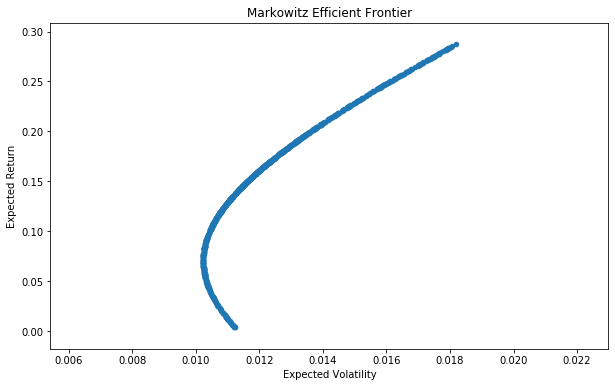

In [71]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Markowitz Efficient Frontier')

plt.show()

# The Capital Asset Pricing Model

## Calculating the expected return of a stock (using the CAPM)

In [73]:
import numpy as np
import pandas as pd


data = pd.read_csv(r'C:/Users/gordo/Programming/Education/Packt/Hands_On_Python_For_Finance/Chapter06/MSFT_S&P.csv',
                   index_col = 'Date')
data
    
sec_returns = np.log( data / data.shift(1) )
cov = sec_returns.cov() * 250
cov_with_market = cov.iloc[0,1]
market_var = sec_returns['^GSPC'].var() * 250

MSFT_beta = cov_with_market / market_var

### EXPECTED RETURN 

In [77]:
MSFT_er = 0.025 + MSFT_beta * 0.05
MSFT_er

0.0806472257609971

### Obtaining the Sharpe ratio in Python

In [78]:
Sharpe = (MSFT_er - 0.025) / (sec_returns['MSFT'].std() * 250 ** 0.5)
Sharpe

0.23995502423552598

## Different use cases of the CAPM using the scipy library

In [81]:
from scipy import stats
import pandas as pd
import pandas_datareader as web

In [94]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2020-03-06')


spy_etf = web.DataReader('SPY','yahoo',start,end)
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.788483
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.034081
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.099579
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,93.492622
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.803726


In [95]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2561 entries, 2010-01-04 to 2020-03-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2561 non-null   float64
 1   Low        2561 non-null   float64
 2   Open       2561 non-null   float64
 3   Close      2561 non-null   float64
 4   Volume     2561 non-null   float64
 5   Adj Close  2561 non-null   float64
dtypes: float64(6)
memory usage: 140.1 KB


In [96]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2020-03-06')

aapl = web.DataReader('AAPL','yahoo',start,end)
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753


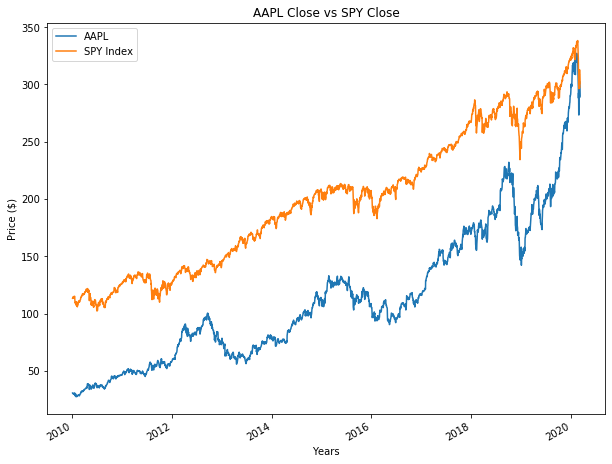

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.xlabel('Years')
plt.ylabel('Price ($)')
plt.legend()
plt.title('AAPL Close vs SPY Close')
plt.show()

## Cumulative Return

In [98]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

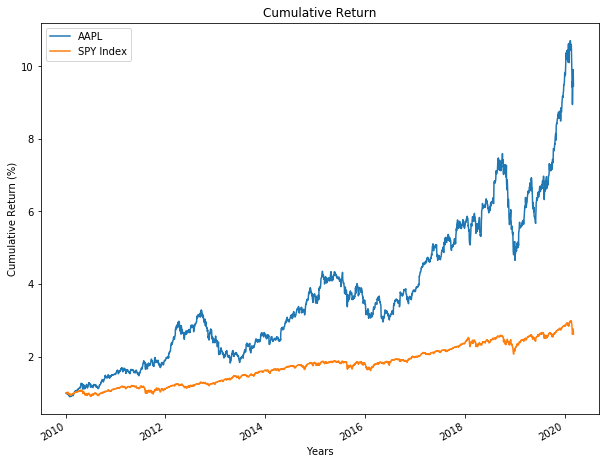

In [102]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.xlabel('Years')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.title('Cumulative Return')

plt.show()

## DAILY RETURN VALUES FOR:   AAPL vs SPY

In [103]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

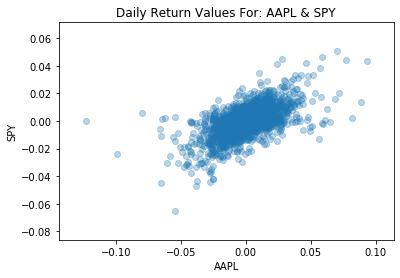

In [107]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)
plt.xlabel('AAPL')
plt.ylabel('SPY')
plt.title('Daily Return Values For: AAPL & SPY')
plt.show()

* WE CAN SEE THE OVERLAPPING CORRELATION BETWEEN THE 2 ASSETS ABOVE
* LETS GRAPH THEIR RETURNS VIA HISTOGRAPHS TO TEST FURTHER CORRELATION

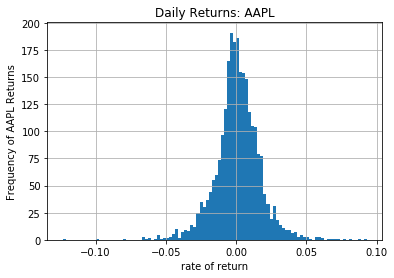

In [110]:
aapl['Daily Return'].hist(bins=100)
plt.xlabel('rate of return')
plt.ylabel('Frequency of AAPL Returns')
plt.title('Daily Returns: AAPL')

plt.show()

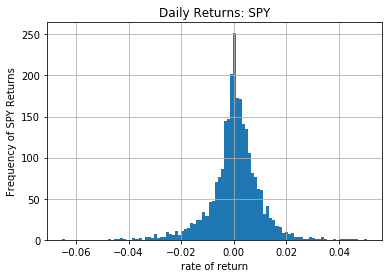

In [111]:
spy_etf['Daily Return'].hist(bins=100)
plt.xlabel('rate of return')
plt.ylabel('Frequency of SPY Returns')
plt.title('Daily Returns: SPY')

plt.show()

## ALPHA   &   BETA   VALUES

In [112]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [116]:
print('ALPHA = '+str(alpha))
print('BETA = '+str(beta))

ALPHA = 6.691319163026942e-05
BETA = 0.35016441249350916


# Regression Analysis in Finance

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [157]:
dataset = pd.read_csv(r'C:/Users/gordo/Programming/Education/Packt/Hands_On_Python_For_Finance/Chapter07/Startups_Invest.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [158]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [159]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## note
The State column is a categorical feature, so we need to convert the categorical feature into dummy variables using pandas. Our final regression model will not be able to understand categorical features, since they are in the form of strings. The regression model usually understands mathematical calculations using various algorithms, so we need to convert the categorical variables into dummy variables. To do this, we will be using a pandas function, get_dummies().

Here is the syntax of the get_dummies() function:

In [160]:
State=pd.get_dummies(X.iloc[:,3],drop_first=True)
State.head(10)

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


## note
Since we have converted the State column into categorical features, we will be deleting the State column, as it is no longer required. This can be done as follows:

In [161]:
X.drop('State',axis=1,inplace=True)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


## note
We can see that the State column has been dropped successfully.

We need to concatenate the dummy variables that were created from the State feature, which is stored in the State variable. To concatenate them, we use the concat() function that's present in the pandas library. The code is as follows

In [162]:
X=pd.concat([X,State],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


## note
We can see that the dummy variable columns have been added to the X variable. With this, we have completed the data-preprocessing step. The next step is to divide the independent features, X, and the dependent feature, y, into training and test data using the scikit learn library.

First, we import the sklearn library, as shown here:

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [165]:
from sklearn.tree import DecisionTreeRegressor
decisionregressor=DecisionTreeRegressor()
decisionregressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [166]:
y_pred=decisionregressor.predict(X_test)
y_pred

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 108733.99,
        71498.49,  99937.59, 108733.99, 156991.12])

In [167]:
from sklearn.metrics import r2_score

In [168]:
score=r2_score(y_test,y_pred)
score

0.9764409182568788

In [173]:
from IPython.display import Image 
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot 

In [174]:
features = list(X_train)
features

['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'New York']

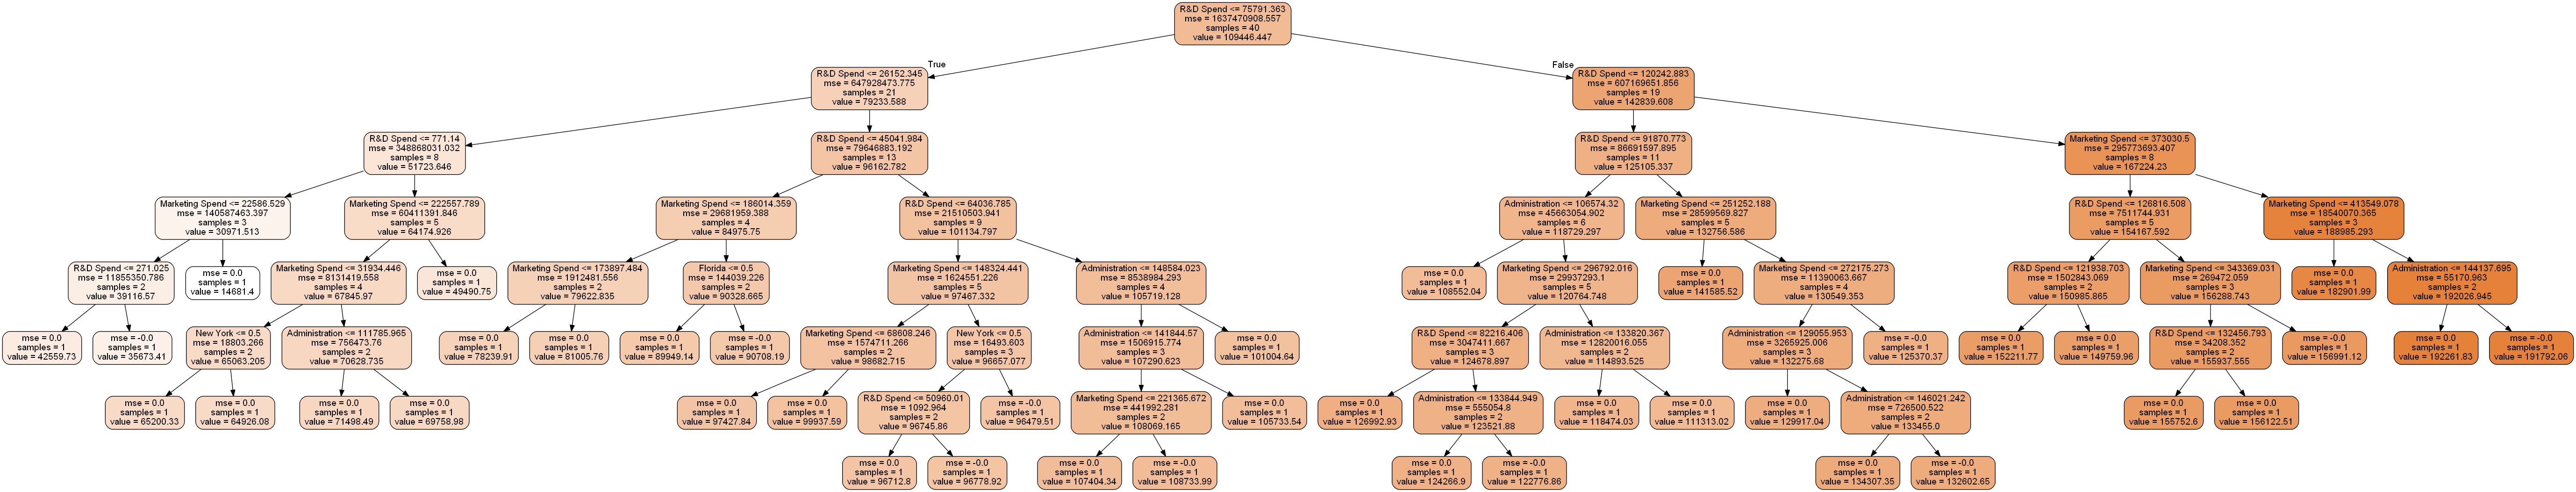

In [180]:
dot_data = StringIO()
export_graphviz(decisionregressor, out_file = dot_data, feature_names = features, filled = True, rounded = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Monte Carlo Simulations for Decision Making

## Using Monte Carlo simulation to forecast stock prices – part 1
In this section, we will be gaining further knowledge on how to implement Monte Carlo simulations in the real world. Here, we will be looking at how we can run or implement simulations, which, in turn, will help us to predict the stock price of any company.

First, we will import all the important libraries that we have already used, as shown here:

In [181]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline

In [184]:
data = pd.read_csv(r'C:/Users/gordo/Programming/Education/Packt/Hands_On_Python_For_Finance/Chapter08/MSFT_2000.csv',
                   index_col = 'Date')

                MSFT
Date                
2017-10-12  0.009118
2017-10-13  0.004786
2017-10-16  0.002063
2017-10-17 -0.000773
2017-10-18  0.000258


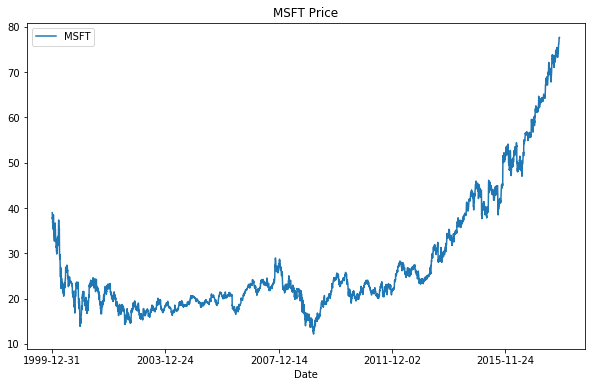

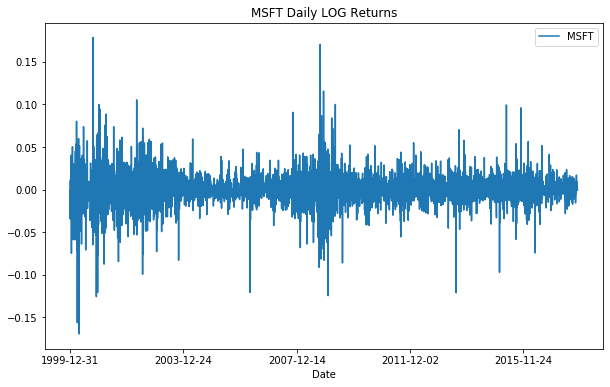

In [191]:
log_returns = np.log(1 + data.pct_change())

print(log_returns.tail())


data.plot(figsize=(10, 6));
plt.title('MSFT Price')

log_returns.plot(figsize = (10, 6))
plt.title('MSFT Daily LOG Returns')
plt.show()

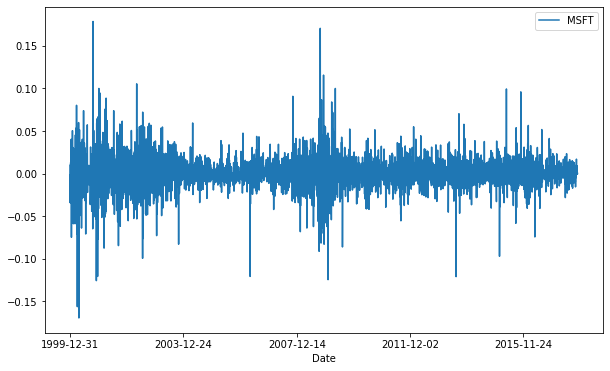

## Brownian Motion

In [199]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

print('u = '+str(u))
print('')
print('var = '+str(var))
print('')
print('drift = '+str(drift))
print('')
print('stdev = '+str(stdev))

u = MSFT    0.000154
dtype: float64

var = MSFT    0.000376
dtype: float64

drift = MSFT   -0.000034
dtype: float64

stdev = MSFT    0.019397
dtype: float64


## Using Monte Carlo simulation to forecast stock prices – part 2
In the previous section, we obtained the values of the drift and standard deviation, which we need to calculate the daily returns.

We will be using a type() function, which allows us to check the drift variable datatype and see it as a pandas series.

The code to check the type of drift variable that was computed in the previous section is as follows:

In [200]:
type(drift)
type(stdev)

np.array(drift)
drift.values

array([-3.42521946e-05])

In [201]:
stdev.values

array([0.01939682])

In [202]:
norm.ppf(0.95)

1.6448536269514722

In [203]:
x = np.random.rand(10, 2)
x

array([[0.90563504, 0.03316092],
       [0.8237271 , 0.26028329],
       [0.83187152, 0.35192871],
       [0.79674456, 0.93683087],
       [0.1760696 , 0.83157818],
       [0.87236601, 0.47531392],
       [0.62087775, 0.33033714],
       [0.1937152 , 0.96351463],
       [0.98215578, 0.54307166],
       [0.95060746, 0.45426105]])

In [204]:
norm.ppf(x)

array([[ 1.31434563, -1.83624217],
       [ 0.92966261, -0.6424723 ],
       [ 0.9615873 , -0.38011855],
       [ 0.83004935,  1.52870231],
       [-0.93044794,  0.96042046],
       [ 1.13764684, -0.06191837],
       [ 0.30778689, -0.4389824 ],
       [-0.86428671,  1.79301368],
       [ 2.10045957,  0.10817523],
       [ 1.65077231, -0.11490288]])

In [205]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.40074984,  0.5841553 ],
       [-0.36068755,  0.89548125],
       [ 0.17255504,  1.06091265],
       [-1.04555365, -0.7359969 ],
       [-1.36602616, -0.57507581],
       [ 1.46541587, -0.16499294],
       [ 0.36561644,  0.2260342 ],
       [-1.01562349, -1.876983  ],
       [ 0.65054702,  0.47568145],
       [ 0.59310292,  0.05629226]])

In [206]:
t_intervals = 1000
iterations = 10

In [207]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.93502862, 0.99908564, 1.02369603, ..., 0.97833838, 0.99725787,
        1.00610114],
       [0.98159755, 0.9892229 , 0.96943303, ..., 0.99149   , 1.00546467,
        0.97296651],
       [0.99065357, 1.01425163, 0.98448399, ..., 1.00838811, 0.99900555,
        1.01173985],
       ...,
       [0.99754351, 1.02964953, 0.97128899, ..., 0.9558719 , 1.03427375,
        1.03000258],
       [0.98796149, 1.01177621, 0.98582033, ..., 0.96975669, 0.99717739,
        1.0198965 ],
       [0.97588297, 0.98922211, 0.99254405, ..., 0.99395735, 0.99866476,
        1.00244959]])

## Using Monte Carlo simulation to forecast stock prices – part 3

In this section, we need to create a price list. Each price must equal the price of the product that was observed the previous day, as shown here:

St= S0 . daily_returnt

St+1 = St . daily_returnt+1 

...
St+999 = St+998 . daily_returnt+999 

Once we calculate the price of the stock at the date specified by t, we can predict the price of the stock at the date specified by t+1. This process will then continue 1,000 times, giving us predictions of the stocks for 1,000 days in the future. 

We have already created a matrix that contains the daily returns (daily_returns), so the daily_returns variable is available. The question remains, however, whether the first price in the list will be 0 or $1 million.

To make useful predictions, the first stock price in our list must be considered or initialized as the last one in the dataset. This is called the current market price. We will call this variable S0 and it will contain the stock price of the starting day, specified as t0. The last piece of data can be retrieved using the iloc operator that's present in the pandas library, as shown here:

In [208]:
S0 = data.iloc[-1]
S0

MSFT    77.610001
Name: 2017-10-18, dtype: float64

The preceding price is the first stock price that we will enter in the list. Then we will insert the other stock prices. This list should have the same size as that of the daily_returns array. The stock price list will be equal to that of the daily_returns array size.

We will be using a method which is zeros_like() within the NumPy library, which will be used to create an array. The code is as follows:

In [209]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

From the preceding output, we have obtained an array of 1,000 by 10 elements, similar to the dimensions of the daily returns, that we can now fill with zeros. This step is necessary to replace all the zero values with the expected stock prices. First, we must set the first row of our price list to S0. Note that S0 will be the initial value for each of the 10 iterations we intend to generate. The code is as follows:

In [210]:
price_list[0] = S0
price_list

array([[77.610001, 77.610001, 77.610001, ..., 77.610001, 77.610001,
        77.610001],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

We can now create our stock price list, wherein we will run a loop from day 1 to the 1000th day. The expected price of the stock on any day t will be calculated as stock price at t-1 times the daily returns observed on day t. The code is as follows:

In [211]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list

array([[77.610001  , 77.610001  , 77.610001  , ..., 77.610001  ,
        77.610001  , 77.610001  ],
       [76.18178717, 76.77359052, 75.23769872, ..., 76.94954021,
        78.03411441, 75.51193186],
       [75.46975941, 77.86773956, 74.07030991, ..., 77.59500129,
        77.95651317, 76.39843026],
       ...,
       [99.55066223, 46.68257152, 63.97654224, ..., 45.44810574,
        46.09962644, 70.75533155],
       [98.35222012, 47.2323155 , 63.06937587, ..., 44.07360468,
        45.96950504, 72.16311488],
       [95.98025626, 46.72325079, 62.59913403, ..., 43.80728326,
        45.90812475, 72.33988494]])

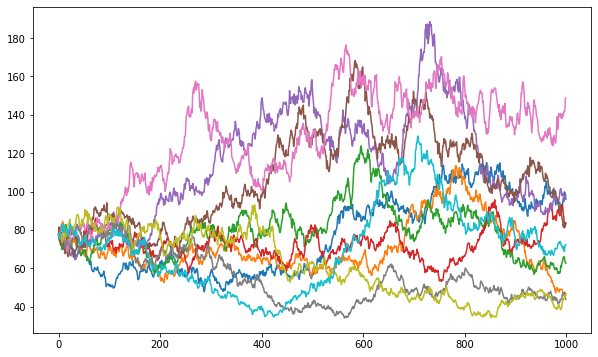

In [212]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

From the preceding output, we will obtain 10 possible paths of the expected stock price of Microsoft (MSFT), starting from the last day present in the dataset. We call these trends iterations, since we iterated through the provided formula 10 times. Here, we have the paths that we simulated.

# Option Pricing - the Black Scholes Model

## Simple linear regression using Python and scikit learn

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel(r'C:/Users/gordo/Programming/Education/Packt/Hands_On_Python_For_Finance/Chapter07/Housing.xlsx')
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [6]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

X.head()

0    1940
1    1300
2    1420
3    1680
4    1270
Name: House Size (sq.ft.), dtype: int64

In [7]:
Y.head()

0    1116000
1     860000
2     818400
3    1000000
4     640000
Name: House Price, dtype: int64

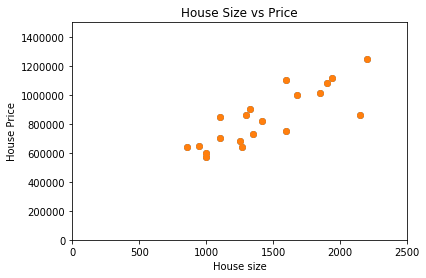

In [11]:
plt.scatter(X,Y)
plt.xlabel("House size")
plt.ylabel("House Price")
plt.title('House Size vs Price')
plt.show()

These scattered points show the house price with respect to the various house sizes. First, we need to set the limits of the x label and the y label limit, as we can see that the house size in the x axis starts from 800, whereas the house price in the y axis starts from around 500,000. This can be done using plt.axis():

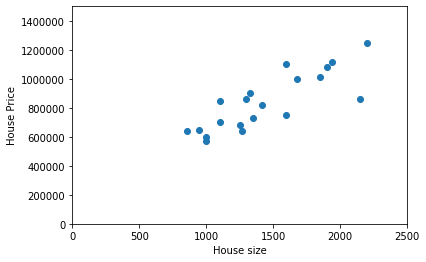

In [12]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.xlabel("House size")
plt.ylabel("House Price")
plt.show()

In the preceding code, we are limiting the x-axis value from a range of 0 to 2,500, whereas we are limiting the y axis to a range of 0 to 1,500,000. This will give us enough space to plot our observation, as shown here:

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [15]:
X_train=np.array(X_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [16]:
from sklearn.linear_model import LinearRegression
linregression=LinearRegression()
linregression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred=linregression.predict(X_test)
y_pred

array([[634973.36884605],
       [772590.58762453],
       [752930.98494189],
       [890548.20372037]])

## Computing the slope and the intercepts

In [19]:
linregression.intercept_

array([261440.9178759])

In [20]:
linregression.coef_

array([[393.19205365]])

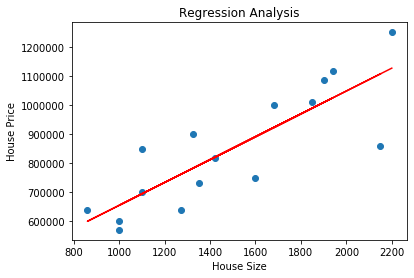

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train)
plt.plot(X_train,linregression.predict(X_train),'r')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.title('Regression Analysis')
plt.show()

## Multiple linear regression in Python using the scikit-learn library

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
dataset = pd.read_csv(r'C:/Users/gordo/Programming/Education/Packt/Hands_On_Python_For_Finance/Chapter07/Startups_Invest.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [28]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [30]:
State=pd.get_dummies(X.iloc[:,3],drop_first=True)
State.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [31]:
X.drop('State',axis=1,inplace=True)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [32]:
X=pd.concat([X,State],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.linear_model import LinearRegression
linregression=LinearRegression()
linregression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred=linregression.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [37]:
linregression.intercept_

42554.16761773238

In [38]:
linregression.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

## Option Pricing - the Black Scholes Model

In [45]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as web 
from scipy.stats import norm 
import matplotlib.pyplot as plt 
%matplotlib inline

In [47]:
data = pd.read_csv(r'C:/Users/gordo/Programming/Education/Packt/Hands_On_Python_For_Finance/Chapter09/PG_2007_2017.csv',
                   index_col = 'Date')

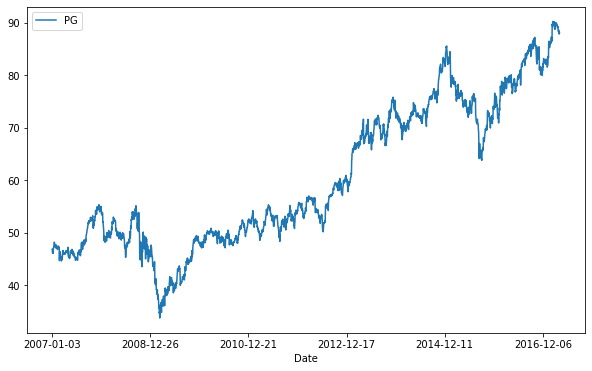

In [48]:
log_returns = np.log(1 + data.pct_change())

r = 0.025

stdev = log_returns.std() * 250 ** 0.5

data.plot(figsize=(10, 6));

In [49]:
stdev = stdev.values

T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000 

Z = np.random.standard_normal((t_intervals + 1, iterations)) 

S = np.zeros_like(Z) 
S0 = data.iloc[-1] 
S[0] = S0

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])
    
S

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 87.88958126,  88.61880686,  87.6700266 , ...,  89.0591362 ,
         88.55888209,  87.5672425 ],
       [ 88.69275989,  88.04553182,  88.45441738, ...,  89.51036135,
         88.37025705,  87.00669965],
       ...,
       [ 71.70286548,  96.92079092,  95.36139738, ..., 112.35303129,
         69.91052034,  78.77607305],
       [ 71.71425135,  97.56687771,  96.9776493 , ..., 113.70422088,
         69.34537764,  77.5668377 ],
       [ 71.49077392,  98.40373569,  97.36565313, ..., 114.26625898,
         69.82406249,  77.48729128]])

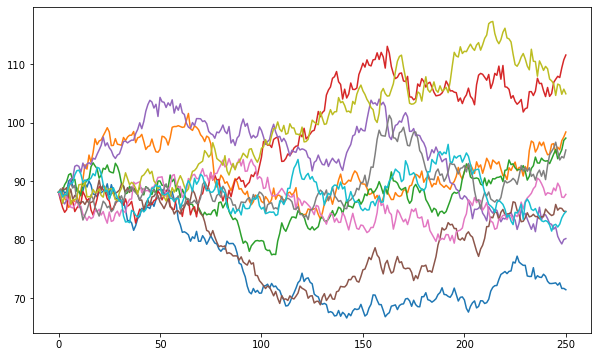

In [50]:
plt.figure(figsize=(10, 6))
plt.title('')
plt.plot(S[:, :10]);

Our simulation is complete and now we will go ahead and compute the call option price.

Let's see what the payoff is like for a call option. At a certain point in time, we will exercise our right to buy the option if the stock price minus the strike price is greater than zero. We will not exercise our right to buy if the difference is a negative number.

So, the value of the option depends on the chance of the difference between the stock price (S) and the strike price (K) being positive and, in particular, how positive it is expected to be. 

To work this out, we can use a NumPy method called maximum(), which will create an array that contains either zeros or the numbers equal to the differences. We call p, which represents the payoff. The code is as follows:

In [52]:
p = np.maximum(S[-1] - 110, 0)
p

array([0.        , 0.        , 0.        , ..., 4.26625898, 0.        ,
       0.        ])

In [60]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

1.0930859375006248

# Introduction to Deep Learning with TensorFlow and Keras